In [250]:
# python-sounddevice.readthedocs.io/en/0.3.12/examples.html
# %pip install sounddevice

Note: you may need to restart the kernel to use updated packages.


In [10]:
import pyrealsense2 as rs
import numpy as np
import cv2
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import sounddevice as sd
import math
import time
from IPython.display import Image

In [2]:
width = 640
height = 480
new_width = 7
new_height = 7

KeyboardInterrupt: 

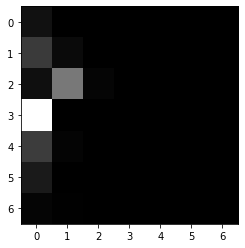

In [12]:
pipeline = rs.pipeline()
config = rs.config()
config.enable_stream(rs.stream.depth, width, height, rs.format.z16, 30)
profile = pipeline.start(config)
depth_sensor = profile.get_device().first_depth_sensor()
depth_scale = depth_sensor.get_depth_scale()
real_values = []
sum_values = []
while True:
    frames = pipeline.wait_for_frames()
    depth = frames.get_depth_frame()
    depth_data = depth.get_data()
    depth_image = np.asanyarray(depth_data)
    resized_depth_image = cv2.resize(depth_image, (new_width, new_height), interpolation=cv2.INTER_AREA)
    #plt.savefig('depth.png')
    plt.imshow(resized_depth_image, cmap='gray')
    #max(resized_depth_image.reshape(7*7))    
    left_sum = np.sum(resized_depth_image, axis = 0)/65536
    right_sum = np.sum(resized_depth_image, axis = 1)/65536
    fs = int(44100)
    frequences = [j for j in range(10,90,10)]
    data = [
        [
            sum([math.sin(x/frequences[cell])*left_sum[cell] for cell in range(7)]),
            sum([math.sin(x/frequences[cell])*right_sum[cell] for cell in range(7)])
        ] for x in range(fs)
    ]
    #sd.play(data[:10000], fs)
    sd.play(data, fs)
    #Image(filename='depth.png')
    time.sleep(0.1)

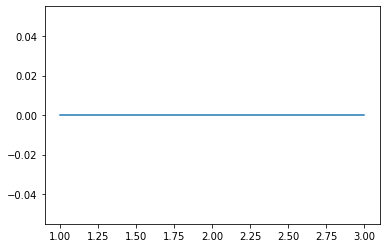

Press [enter] to continue.9


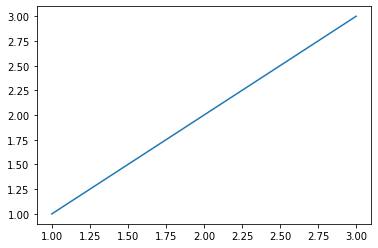

Press [enter] to continue.2


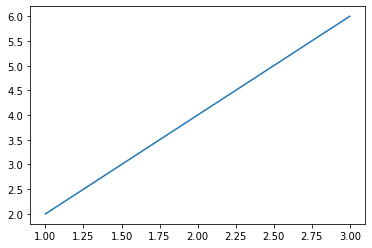

KeyboardInterrupt: Interrupted by user

In [241]:
resized_depth_image

array([[   63,   263,   195,   907,  1089,   691, 11078],
       [   56,   349,   332,  1099,   182,   843,  3367],
       [   70,   331,   190,   280,   493,  2307,  2555],
       [   49,   341,   344,   281,   499,  2926,  2590],
       [   33,   336,   212,   722,   408,  1539,  2290],
       [   56,   275,   429,   509,   576,   891,  1070],
       [  104,   366,   439,   432,   431,   793,   726]], dtype=uint16)

In [321]:
left_sum = np.sum(resized_depth_image, axis = 0)/65536
left_sum

array([0.00657654, 0.03450012, 0.03266907, 0.06454468, 0.05612183,
       0.1524353 , 0.36126709])

In [322]:
right_sum = np.sum(resized_depth_image, axis = 1)/65536
right_sum

array([0.21798706, 0.09503174, 0.09500122, 0.10726929, 0.08453369,
       0.05807495, 0.05021667])

array([[0.09197998, 0.12335205, 0.15795898, 0.050354  , 0.04624939,
        0.07154846, 0.08966064],
       [0.13948059, 0.17085266, 0.20545959, 0.09785461, 0.09375   ,
        0.11904907, 0.13716125],
       [0.12788391, 0.15925598, 0.19386292, 0.08625793, 0.08215332,
        0.10745239, 0.12556458],
       [0.12956238, 0.16093445, 0.19554138, 0.0879364 , 0.08383179,
        0.10913086, 0.12724304],
       [0.12942505, 0.16079712, 0.19540405, 0.08779907, 0.08369446,
        0.10899353, 0.12710571],
       [0.15711975, 0.18849182, 0.22309875, 0.11549377, 0.11138916,
        0.13668823, 0.15480042],
       [0.22009277, 0.25146484, 0.28607178, 0.1784668 , 0.17436218,
        0.19966125, 0.21777344]])

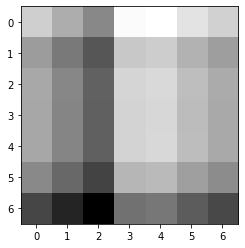

In [373]:
restored_depth_image = np.array([left_sum for i in range(7)])
restored_depth_image += np.array([right_sum for i in range(7)]).T
plt.imshow(1-restored_depth_image, cmap='gray')
restored_depth_image

In [320]:
left_sum/65536

array([0.00657654, 0.03450012, 0.03266907, 0.06454468, 0.05612183,
       0.1524353 , 0.36126709])

In [358]:
fs = int(44100)
frequences = [j for j in range(10,90,10)]
x=3
%time data = [[sum([math.sin(x/frequences[cell])*left_sum[cell] for cell in range(7)]),sum([math.sin(x/frequences[cell])*right_sum[cell] for cell in range(7)])] for x in range(fs)]

CPU times: user 349 ms, sys: 0 ns, total: 349 ms
Wall time: 346 ms


In [366]:
sd.play(data[:10000], fs)